<a href="https://colab.research.google.com/github/Bharathi022002/Diabetes_Prediction_ML/blob/main/Diabetes_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI LAB TASK 4.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


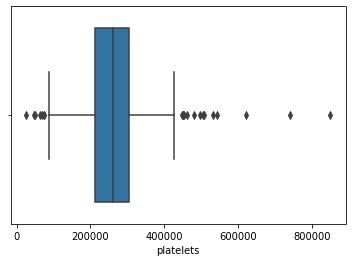

In [ ]:
sns.boxplot(x = df['platelets'])

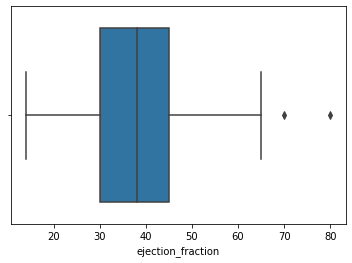

In [ ]:
sns.boxplot(x = df['ejection_fraction'])

In [ ]:
def normalize(df):
    max = df.max
    min = df.min
    mean = df.mean()
    df = (df - mean) / (max - min)
    return df


d = df['ejection_fraction']
e = (d - d.mean()) / (d.std())

In [ ]:
df['ejection_fraction'] = e
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,-1.527998,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,-0.007065,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,-1.527998,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,-1.527998,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,-1.527998,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df['platelets'] = (df['platelets'] - df['platelets'].mean()) / (df['platelets'].std())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,-1.527998,1,1.678834e-02,1.9,130,1,0,4,1
1,55.0,0,7861,0,-0.007065,0,7.523047e-09,1.1,136,1,0,6,1
2,65.0,0,146,0,-1.527998,0,-1.036336e+00,1.3,129,1,1,7,1
3,50.0,1,111,0,-1.527998,0,-5.455595e-01,1.9,137,1,0,7,1
4,65.0,1,160,1,-1.527998,0,6.507077e-01,2.7,116,0,0,8,1


In [ ]:
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean()) / (df['serum_sodium'].std())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,-1.527998,1,1.678834e-02,1.9,-1.501519,1,0,4,1
1,55.0,0,7861,0,-0.007065,0,7.523047e-09,1.1,-0.141739,1,0,6,1
2,65.0,0,146,0,-1.527998,0,-1.036336e+00,1.3,-1.728149,1,1,7,1
3,50.0,1,111,0,-1.527998,0,-5.455595e-01,1.9,0.084892,1,0,7,1
4,65.0,1,160,1,-1.527998,0,6.507077e-01,2.7,-4.674340,0,0,8,1


In [ ]:
y = df.DEATH_EVENT
X = df.drop('DEATH_EVENT', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
Prediction = lm.predict(X_test)

lm.score(X_train,y_train)

0.43762771800106104

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

Prediction = log.predict(X_test)

log.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.87

In [ ]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

Prediction_SVM = svc.predict(X_test)

svc.score(X_train, y_train)

0.735

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

Prediction_KNC = knn.predict(X_test)

knn.score(X_train, y_train)

1.0

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

Prediction_G = gaussian.predict(X_test)

gaussian.score(X_train, y_train)

0.825

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, y_train)

Prediction_GBC = gradient_boost.predict(X_test)

gradient_boost.score(X_train, y_train)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
RFC_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

1.0